In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Encoded Data.

In [57]:
df = pd.read_csv('encodedData.csv')
df.head()

,Unnamed: 0,response,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q11,...,Q14,Q15,Q18,Q20,Q21,Q22,Q25,Q26,Q27,Q28
0,0,1,daily,3,3,2,2,4,4,4,...,4,3,3,4,3,4,4,3,3,3
1,1,2,daily,4,4,4,5,4,5,4,...,5,5,5,4,4,5,5,3,3,4
2,2,3,weekly,2,3,5,5,3,5,4,...,3,5,4,5,5,5,5,3,3,2
3,3,4,weekly,4,5,5,4,3,5,4,...,3,2,3,3,4,5,4,1,3,2
4,4,5,daily,4,3,4,4,3,4,2,...,3,3,3,4,4,4,3,3,4,1


compute means and std for each question for each prototype

In [58]:

p_0_questions = ['Q6','Q7','Q8','Q11']  # Clarity, Compare, Security, Like
p_1_questions = ['Q13','Q14','Q15','Q18']
p_2_questions = ['Q20','Q21','Q22','Q25']
p0df = df[p_0_questions]
p1df = df[p_1_questions]
p2df = df[p_2_questions]
all_data_frames = [p0df, p1df, p2df]

question_labels = ['Clarity', 'Comparison', 'Security', 'Rating']
prototype_names = ['Push Notification', 'User Time Frame', 'Face ID']



Push Notification
Q0-Clarity mean: 4.473684210526316 std: 1.1239029738980328
Q1-Comparison mean: 3.5789473684210527 std: 0.9612370197756298
Q2-Security mean: 3.789473684210526 std: 1.1822270588653645
Q3-Rating mean: 3.736842105263158 std: 0.9334586382051248

User Time Frame
Q0-Clarity mean: 3.736842105263158 std: 0.9334586382051249
Q1-Comparison mean: 2.789473684210526 std: 1.1342617456312007
Q2-Security mean: 3.4210526315789473 std: 1.0173926082384548
Q3-Rating mean: 3.473684210526316 std: 0.9048278567177283

Face ID
Q0-Clarity mean: 4.2631578947368425 std: 0.8719139396343282
Q1-Comparison mean: 4.157894736842105 std: 0.9581903020646578
Q2-Security mean: 4.421052631578948 std: 0.7685331969757722
Q3-Rating mean: 4.315789473684211 std: 0.6710382982072027



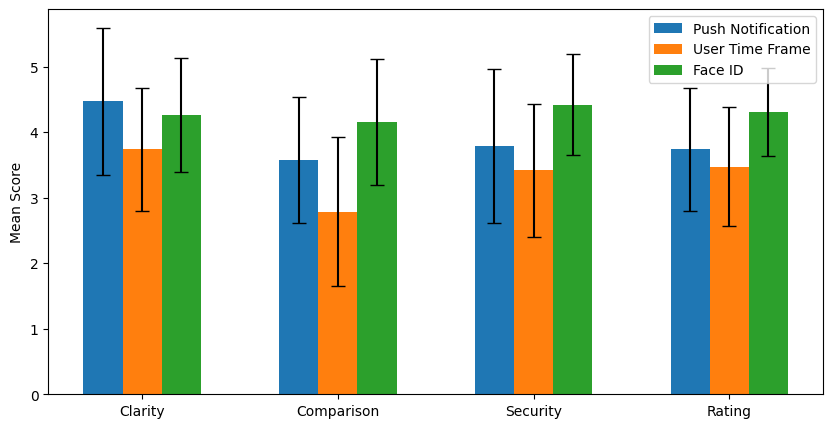

In [59]:
def mean(d: pd.DataFrame):
    cols = [d[col] for col in d.columns]
    return [col.mean() for col in cols]

def std(d: pd.DataFrame):
    cols = [d[col] for col in d.columns]
    return [col.std() for col in cols]

means = []
stdDevs = []
for frame in all_data_frames:
    means.append(mean(frame))
    stdDevs.append(std(frame))


plt.figure(figsize=(10,5))
ax = plt.gca()
barwidth = 0.2
x_axis = np.arange(len(question_labels))

numFrames = len(all_data_frames)
startX = barwidth*-1.5
for i in range(numFrames):
    print(f"{prototype_names[i]}")
    for q in range(len(means[i])):
        print(f"Q{q}-{question_labels[q]} mean: {means[i][q]} std: {stdDevs[i][q]}")
    plt.bar(x_axis + startX + barwidth * (i + 0.5), means[i], barwidth, yerr = stdDevs[i], capsize=5, label=prototype_names[i])
    print("")

plt.legend()
ax.set_ylabel("Mean Score")
ax.set_xticks(x_axis,question_labels)


In [ ]:
comparison_qs = ['Q27','Q28']
comparison_titles = ['Most Liked','Least Liked']
encode_labels = {
    {}
}

for i in range(len(comparison_qs)):
    camprison_df = df[comparison_qs[i]]
